In [ ]:
#Proyecto clasificador de imágenes
#Tras alguna complicación que otra para acceder a la base de datos (no estaba disponible
#en kaggle y al final la he encontrado en Microsoft) ya dispongo de las imágenes a
#clasificar. Aún hace falta dejarlas en el formato adecuado de 200x200 píxeles, así
#como separarlas en train y test. Voy a pegar aquí el código con el que paso las imágenes
#a tamaño 200x200, aunque no lo ejecutaré aquí sino en local, para no pedirle a google
#Colab más de lo que seguramente pueda dar

#Lo primero es escalar las fotos. He visto que ni siquiera todas las imágenes son cuadradas,
#con lo cual voy a tener que elegir entre recortarlas (que explorando la galería he
#concluido que no es una buena idea porque no siempre el animal aparece centrado y
#se corre el riesgo de cortar alguna parte "importante" para la red neuronal)
#Achatarlas o alargarlas un poco hasta que sean cuadradas. Esta opción tampoco me
#convence mucho porque creo que la red neuronal tal vez termine apoyándose en la forma
#de los ojos y otros patrones similares que pueden depender de no estar distorsionados
#más para la red neuronal que para una persona. Prefiero ponérselo fácil

#La tercera opción, que es la que he elegido, consiste en añadir un poco de fondo de
#algún color sólido (Negro). No hay distorsión ni se corre el riesgo de recortar información
#importante. Además, como hay muchas fotos, creo que será relativamente sencillo a
#la red aprender que esa parte no aporta información útil para discernir nada.

#Me voy a inclinar por el azul en lugar de por el negro porque tanto gatos como perros
#pueden tener zonas de color negro que le sean de ayuda a la DNN para identificarlos
#Ni gatos ni perros contienen por sí mismos el azul, así que igual esta es una manera
#de facilitarle identificar que el color azul es solo relleno sin información útil



In [7]:
from PIL import Image, ImageOps
import os

#Una vez conseguidas las imágenes y subidas a google drive, paso a procesarlas dándole
#al programa acceso a las carpetas de drive donde las tengo separadas en train y test,
#y dentro de train y test están separadasa su vez en Cat y Dog.

#Como sabemos, la idea es pasarlas a 200x200 píxeles y hacerla cuadrada con fondo azul
#Por aquí le dejo por donde tiene que tomar las imágenes de las carpetas desde mi drive
#Este código las toma, les aplica la transformaciones que he comentado para prepararlas,
#y luego me genera una nueva carpeta con las imágenes redimensionadas


input_dirs = {"cats": "/Users/jesu/Desktop/kagglecatsanddogs_5340/PetImages/Cat", "dogs": "/Users/jesu/Desktop/kagglecatsanddogs_5340/PetImages/Dog"}
output_dir = "/Users/jesu/Desktop/kagglecatsanddogs_5340/PetImages/Cat 200x200"

os.makedirs(output_dir, exist_ok=True)

#A partir de aquí inicia el procesamiento, en este caso he dejado el (0,0,255) para que
#salga azul el relleno
for category, input_dir in input_dirs.items():
    output_category_dir = os.path.join(output_dir, category)
    os.makedirs(output_category_dir, exist_ok=True)

    for filename in os.listdir(input_dir):
        img_path = os.path.join(input_dir, filename)
        try:
            img = Image.open(img_path).convert("RGB")
            img = ImageOps.pad(img, (200, 200), color=(0, 0, 255))

            img.save(os.path.join(output_category_dir, filename))

        except Exception as e:
            print(f"Error procesando {filename}: {e}")

print("¡Todas las imágenes han sido redimensionadas correctamente!")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jesu/Desktop/kagglecatsanddogs_5340/PetImages/Cat'

In [ ]:
#Ya están todas las imágenes en formato 200x200 con el fondo azul. No es el azul más
#agradable a la vista, pero sí es muy distinto a cualquier color natural de gatos y
#perros, que es la idea.

#Ahora voy a separarlas en entrenamiento y prueba.


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
base_dir = "/content/drive/MyDrive/ESTUDIO/4Geeks/perros_y_gatos/perros_y_gatos_procesado_split"


In [1]:
import os

# Listar contenido de la carpeta base
print("Contenido de la carpeta base:", os.listdir(base_dir))

# Listar categorías dentro de train y test
print("Contenido de train:", os.listdir(os.path.join(base_dir, "train")))
print("Contenido de test:", os.listdir(os.path.join(base_dir, "test")))

# Contar imágenes en cada categoría
train_cats = len(os.listdir(os.path.join(base_dir, "train", "Gatos")))
train_dogs = len(os.listdir(os.path.join(base_dir, "train", "Perros")))
test_cats = len(os.listdir(os.path.join(base_dir, "test", "Gatos")))
test_dogs = len(os.listdir(os.path.join(base_dir, "test", "Perros")))

print(f"Train - Gatos: {train_cats}, Perros: {train_dogs}")
print(f"Test - Gatos: {test_cats}, Perros: {test_dogs}")


NameError: name 'base_dir' is not defined

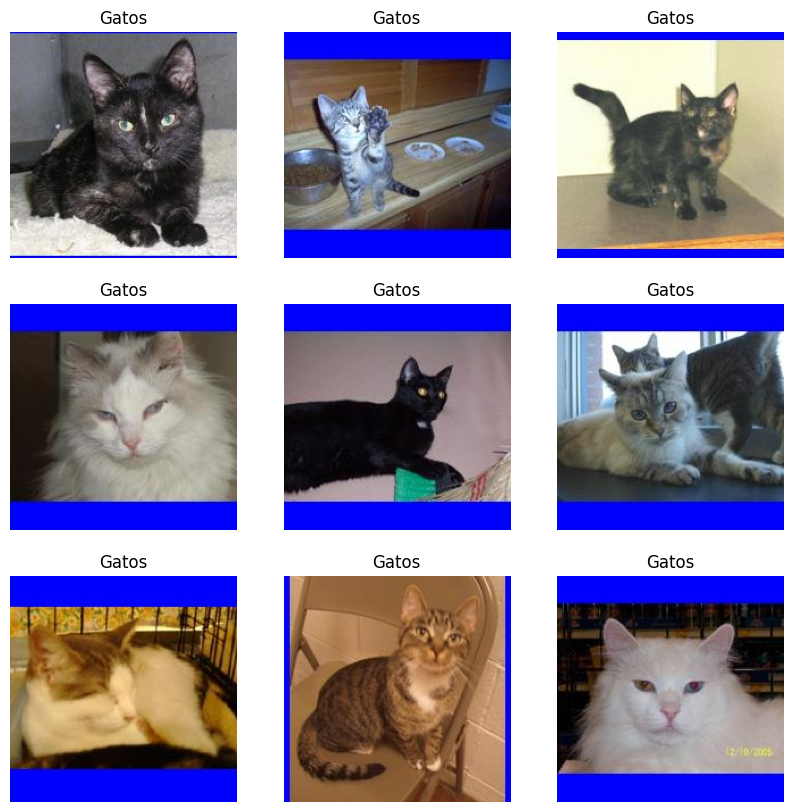

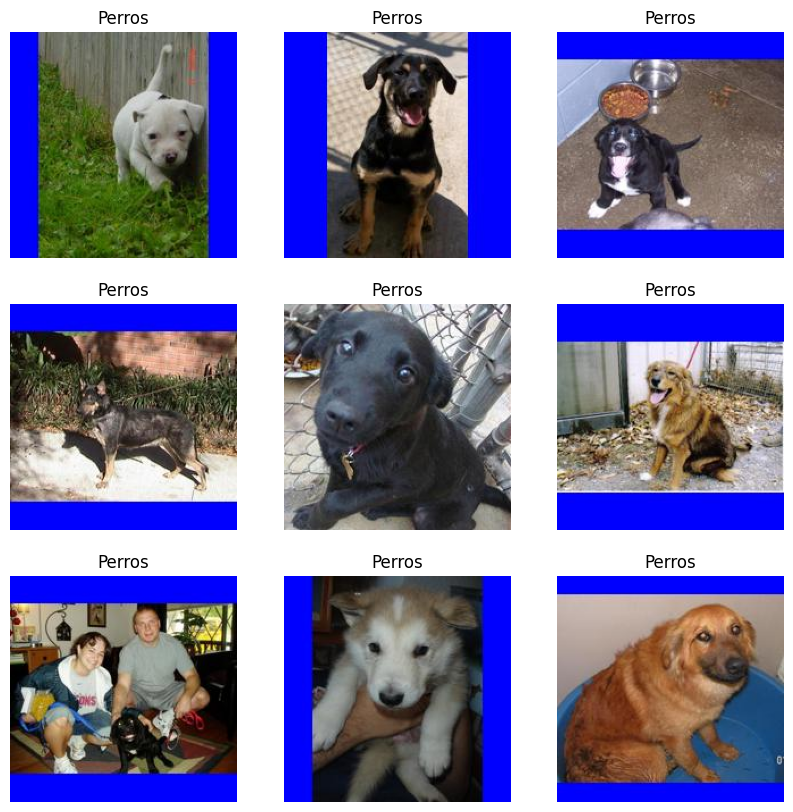

In [10]:
import matplotlib.pyplot as plt
import random
import cv2

#Hace falta opencv para cargar las imágenes

#Ahora nos piden que ploteemos unas pocas imágenes para ver qué aspecto tienen
def show_random_images(category, dataset="train", num_images=9):
    folder_path = os.path.join(base_dir, dataset, category)
    image_files = os.listdir(folder_path)
    random_images = random.sample(image_files, num_images)

    plt.figure(figsize=(10, 10))
    for i, img_name in enumerate(random_images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)  # Leer imagen
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB

        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(category)

    plt.show()

# Mostrar imágenes aleatorias de gatos y perros
show_random_images("Gatos", "train")
show_random_images("Perros", "train")


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Desde aquí me cargo las imágenes preprocesadas de las carpetas para comprobar cuántas
#tengo en cada clase

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest
)

#solo normalización
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
img_size = (200, 200)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)


Found 24963 images belonging to 2 classes.
Found 14816 images belonging to 2 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Por último, creo el modelo
#Es importante destacar que he empleado este "mini modelo" para no estar tanto tiempo
#computando. Más adelante está también el modelo que nos da 4Geeks desde la página
#de formación. Al ser este útimo más lento y tener que presentar el proyecto pronto,
#me he decantado por analizar en detalle este, ya que es el único que ha generado
#resultados a tiempo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(200,200,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  #El dropout 0,5 está para evitar el sobreajuste
    Dense(1, activation='sigmoid')  #Y aquí tiene que ser una salida binaria de perro/gato
])

#Compilar
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Y sacar el informe
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      40,960,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,054,273 (156.61 MB)

 Trainable params: 41,054,273 (156.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Salto aquí para enlazar y para ejecutarlo desde otra celda
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#Al fin, lo entrenamos
history = model.fit(
    train_generator,
    epochs=3,  #En este caso le he metido solamente tres épocas
    validation_data=test_generator
)

#Por cuestiones de tiempo he entrenado este modelo en tres épocas
#La primera de ellas (que ha sido el triple de larga que las otras), ha finalizado
#con una precisión de un 67%, lo cual no está mal para ser la primera. El modelo ya
#Está acertando dos de cada tres imágenes que se le presentan

#En las dos etapas posteriores vemos que el rendimiento sigue subiendo ahsta llegar al
#71.69%.

#Inicialmente me planteé entrenarlo durante 30 épocas. Tal vez lo haga una vez que haya
#entregado el resto de proyectos para ver hasta donde habría llegado

#En cualquier caso, sabemos que el proceso de aprendizaje es logarítmico, por lo que
#lo que espero es que los incrementos porcentuales sean cada vez menores, y seguramente se
#estabilicen alrededor del 85% de precisión

Epoch 1/3
781/781 ━━━━━━━━━━━━━━━━━━━━ 11597s 15s/step - accuracy: 0.5538 - loss: 0.7047 - val_accuracy: 0.6713 - val_loss: 0.6114
Epoch 2/3
781/781 ━━━━━━━━━━━━━━━━━━━━ 3671s 5s/step - accuracy: 0.6424 - loss: 0.6321 - val_accuracy: 0.6857 - val_loss: 0.5855
Epoch 3/3
781/781 ━━━━━━━━━━━━━━━━━━━━ 3597s 5s/step - accuracy: 0.6883 - loss: 0.5871 - val_accuracy: 0.7169 - val_loss: 0.5511


Por aquí dejo el mismo proceso empleando el código de 4Geeks

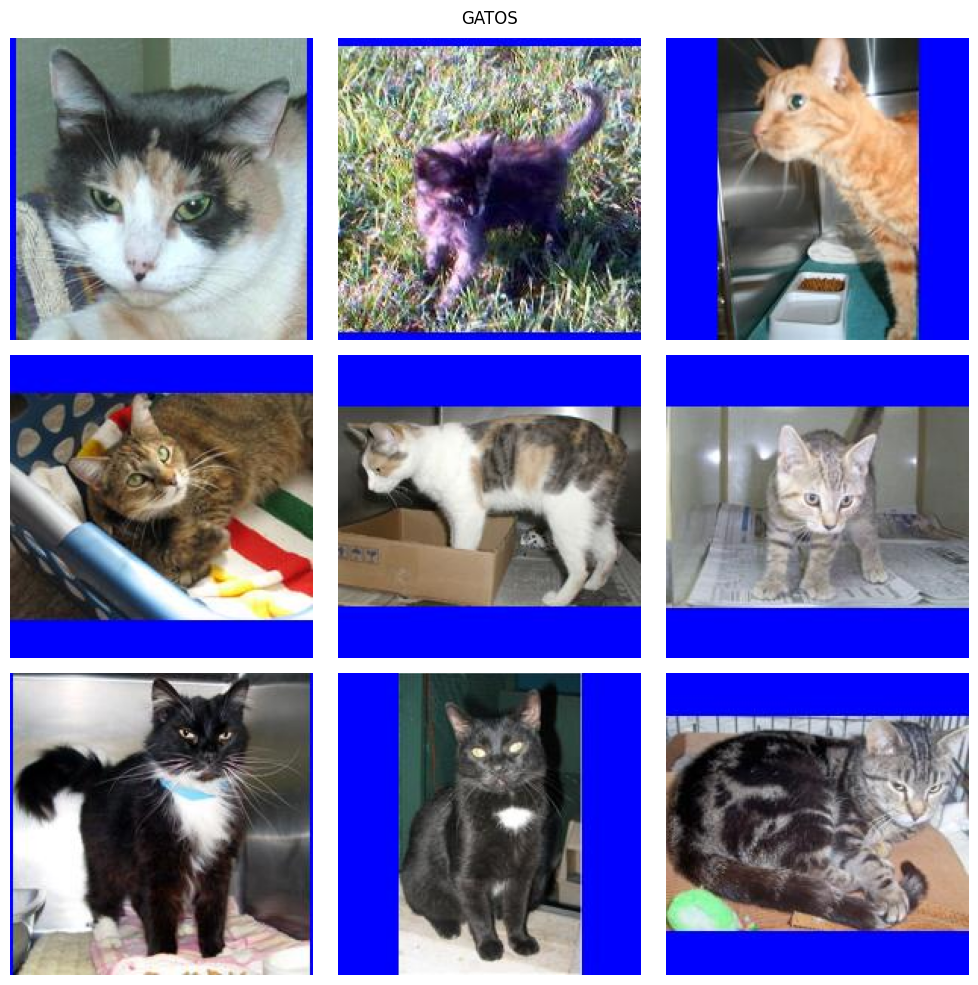

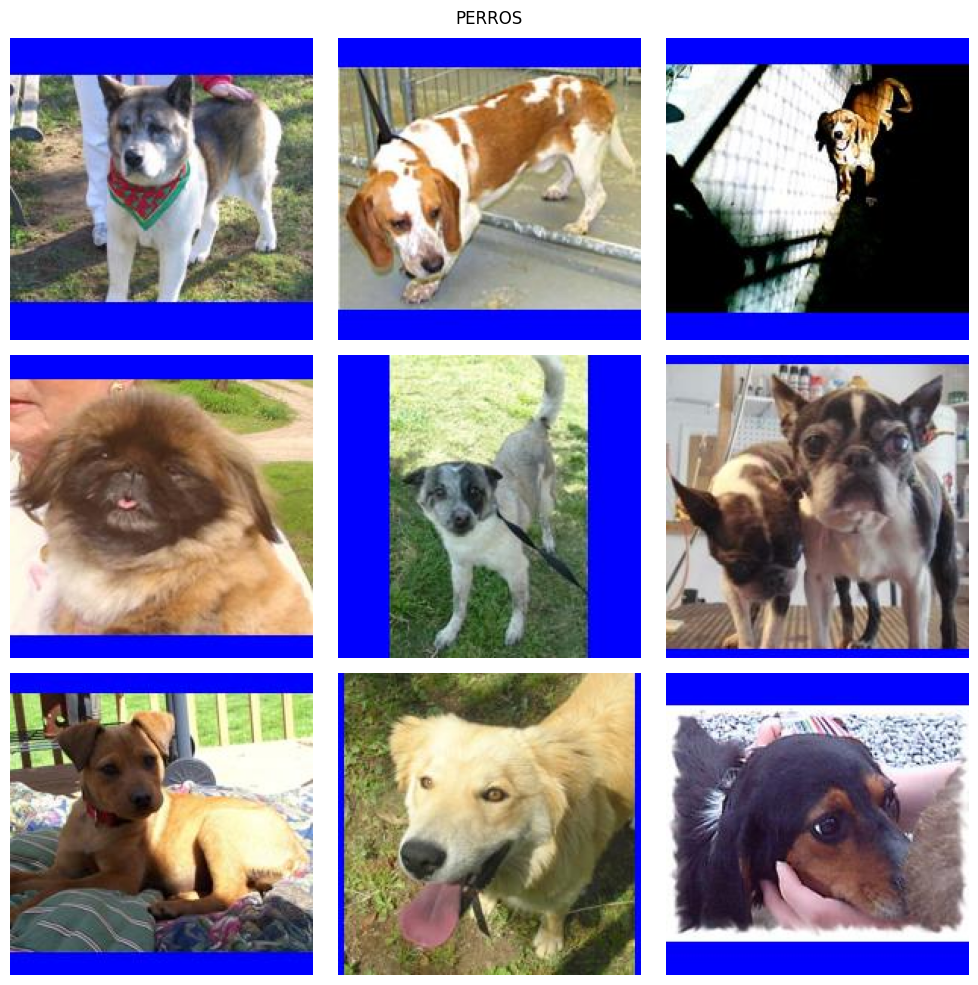

In [2]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def mostrar_ejemplos(ruta_clase, titulo):
    plt.figure(figsize=(10, 10))
    archivos = os.listdir(ruta_clase)[:9]
    for i, archivo in enumerate(archivos):
        img_path = os.path.join(ruta_clase, archivo)
        img = Image.open(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(titulo)
    plt.tight_layout()
    plt.show()

#Saco 9 imágenes
mostrar_ejemplos('/content/drive/MyDrive/ESTUDIO/4Geeks/perros_y_gatos/perros_y_gatos_procesado_split/train/Gatos', 'GATOS')
mostrar_ejemplos('/content/drive/MyDrive/ESTUDIO/4Geeks/perros_y_gatos/perros_y_gatos_procesado_split/train/Perros', 'PERROS')


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(200, 200, 3)))  # Esto reemplaza el input_shape en Conv2D
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096, activation = "relu"))
model.add(Dense(units = 4096, activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

model = Sequential()

# ✅ Capa de entrada limpia (sin warning)
model.add(Input(shape=(200, 200, 3)))

# 🔁 Capas convolucionales estilo VGG16
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# 🧠 Capas densas finales
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))  # Porque es clasificación binaria con 2 clases

# ✅ Compilar el modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/drive/MyDrive/ESTUDIO/4Geeks/perros_y_gatos/perros_y_gatos_procesado_split/train'

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

Found 24963 images belonging to 2 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("modelo_mejor.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/ESTUDIO/4Geeks/perros_y_gatos/perros_y_gatos_procesado_split/test',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

#En esta otra versión la primera epoch de las 8 que le había programado estaba tardando
#unas 10h.
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=val_generator,
    callbacks=[checkpoint, earlystop]
)


Found 14816 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
379/781 ━━━━━━━━━━━━━━━━━━━━ 5:24:20 48s/step - accuracy: 0.4994 - loss: 0.7503